In [1]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd
import io
from datetime import datetime
from IPython.display import Image, display, Markdown


### Display weather observation photos uploaded by "sp_hawk"

**Description:** Double rainbow

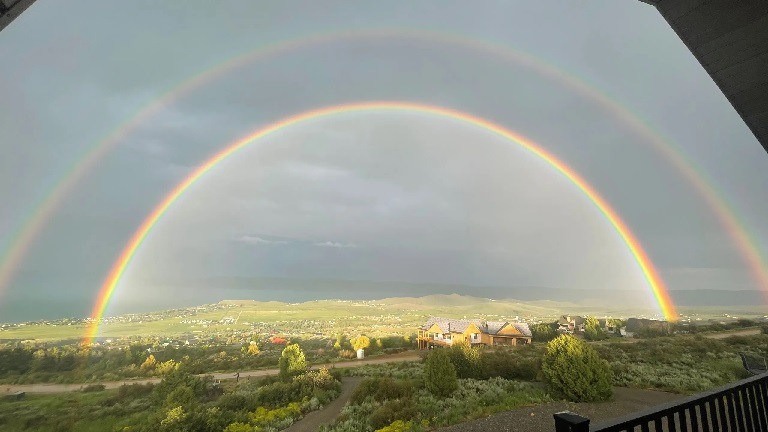

**Description:** Cold frosty morning

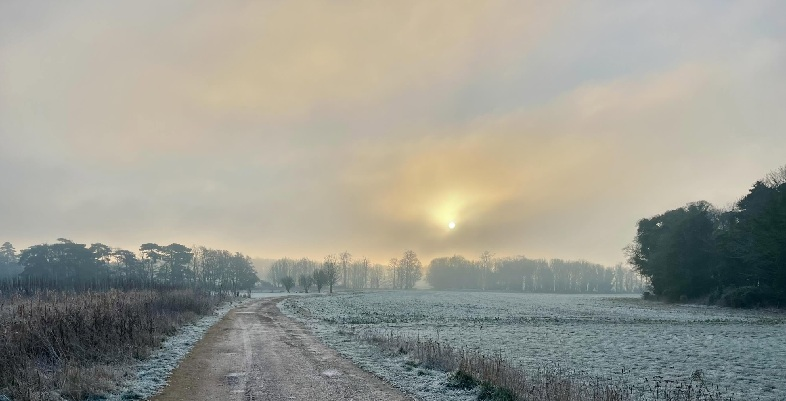

In [2]:
# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017")  
db = client['weather']  # database name
collection = db['weather_reports']

# Find all documents that contain a weather_observation.photo
cursor = collection.find({
    "owner.user_id":"sp_hawk",
    "observations.photo": { "$exists": True }
})

# Loop through and display each image and description
for doc in cursor:
    observations  = doc.get("observations", [])

    # Loop through each observation in the list
    for obs in observations:
        binary_image = obs.get("photo")
        description = obs.get("description", "(No description)")
    
        if binary_image:
            # Display description
            display(Markdown(f"**Description:** {description}"))
        
            # Display the image
            image_stream = io.BytesIO(binary_image)
            display(Image(data=image_stream.read(), width=400))


### Display a chart of temperature v altitude based on the readings from a weather balloon

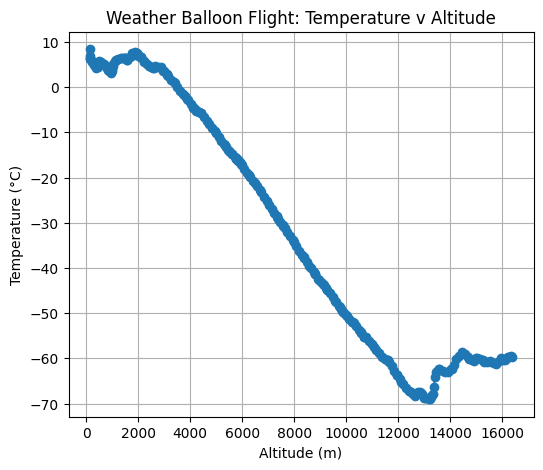

In [3]:
collection = db['weather_balloon_reports']

# Filter by launch_date and station.name
start = datetime(2025, 4, 1)
end = datetime(2025, 4, 2)

filter = {
    "launch_date": {"$gte": start, "$lt": end},
    "station.name": "Larkhill"
}

# Find a single weather balloon report
doc = collection.find_one(filter)

# Extract readings
readings = doc.get('readings', [])

# Convert to DataFrame
df = pd.DataFrame(readings)
df = df[['gpheight', 'temp']].dropna()
df.sort_values(by='gpheight', inplace=True)

# Plot temperature v altitude
plt.figure(figsize=(6, 5))
plt.plot(df['gpheight'], df['temp'], marker='o', linestyle='-')
plt.xlabel('Altitude (m)')
plt.ylabel('Temperature (°C)')
plt.title('Weather Balloon Flight: Temperature v Altitude')
plt.grid(True)
plt.show()
